# numpy: arrays and functions
## 09/12/2023

<a href="?print-pdf">print view</a><br>
<a href="numpy.ipynb">notebook</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

# Arrays

`numpy` arrays are dense, continuous, uniformly sized blocks of identically typed data values

In [2]:
import numpy as np
L = [[0,1],[2,3]]
A = np.array(L)

In [3]:
print("L:",L)
print("A:\n",A)

L: [[0, 1], [2, 3]]
A:
 [[0 1]
 [2 3]]


In [4]:
print(type(L),type(A))

<class 'list'> <class 'numpy.ndarray'>


# Array Memory Layout

<center><img src='imgs/memarray.png'></center>

# Array Memory

In the standard python interpretter, the return value of `id` is the memory address of the object.

In [5]:
print(id(L))

4448783488


In [6]:
print(id(L[1])-id(L[0])) #rows are far away

-128


In [7]:
print(id(L[0][1])-id(L[0][0])) #columns not so much, but 32 bytes?

32


# Why does this matter?

Keeping data close together results in faster access times.
 * It's easier to figure out the location of the data
 * The data is more likely to fit in the processor's *cache*

## If you have a *block* of *dense* numerical data, store it in a `numpy` array

# Creating `numpy` Arrays

Note that `np.ndarray` and `np.array` are the same thing.

In [8]:
A = np.array([1,2,3,4])
A.dtype #type of what is stored in the array - NOT python types!

dtype('int64')

In [9]:
A.ndim #number of dimensions (axes in numpy speak)

1

In [10]:
A.shape #size of the dimensions as a tuple

(4,)

In [11]:
A.reshape((4,1)).shape #a column vector

(4, 1)

In [12]:
%%html
<div id="numpyi8" style="width: 500px"></div>

<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#numpyi8';
	jQuery(divid).asker({
	    id: divid,
	    question: "How much space does an int8 take up?",
		answers: ["1 byte","8 bytes","64 bytes","4 bytes"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [13]:
%%html

<div id="numpyi8z" style="width: 500px"></div>
<script>

    var divid = '#numpyi8z';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the largest number a int8 can store?",
		answers: ["127","128","255","256","inf"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

In [14]:
A = np.array([1,2,3,4]).reshape(4,1)

In [15]:
%%html

<div id="numpydim" style="width: 500px"></div>
<script>

    var divid = '#numpydim';
	jQuery(divid).asker({
	    id: divid,
	    question: "How many dimensions (axes) does A have?",
		answers: ["0","1","2","3","4"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Initializing numpy Arrays

In [16]:
#can initialize an array with a list, or list of lists (or list of lists of lists, etc)
M = np.array([[1,2,3],[4,5,6.0]])
print(M.dtype,M.shape)

float64 (2, 3)


In [17]:
#if know the size, but not the data, can initialize to zeros:
Z = np.zeros((10,10))
#or ones
O = np.ones((5,10))
#or identity
I = np.identity(3) #this makes a 3x3 square identity matrix

In [18]:
print(Z.dtype) #note, default type is floating point

float64


In [19]:
Z = np.zeros((10,10),np.int64) #can change
print(Z.dtype)

int64


# Indexing and Slicing

`numpy` arrays can be indexed and sliced a lot like python lists, but take **tuples** of values to reference each dimension.

In [20]:
M = np.array([[0,1,2],[3,4,5]])
M

array([[0, 1, 2],
       [3, 4, 5]])

In [21]:
print(M[1,1]) #indexing
print(M[0,-1]) #last item of first row

4
2


In [22]:
print(M[0,1:]) #can have slices - all but first column of first row

[1 2]


In [23]:
print(M[1],M[1,:]) #missing indices are treated as complete slices

[3 4 5] [3 4 5]


In [24]:
M = [[0,1,2],[3,4,5]]

In [25]:
%%html

<div id="numpytrick" style="width: 500px"></div>
<script>

    var divid = '#numpytrick';
	jQuery(divid).asker({
	    id: divid,
	    question: "What does M[1,1] return?",
		answers: ["0","1","2","3","4","5","Error"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Advanced Slicing: Integer

`numpy` arrays support advanced indexing by arrays of integers or booleans:

In [26]:
A = np.array([0,1,4,9,16,25])

In [27]:
print(A[[2,5]]) #choose just indices 2 and 5

[ 4 25]


# Advanced Slicing: Boolean

Indexing by **Boolean** *numpy arrays* can be used to select elements

In [28]:
b = A > 4
print(b)

[False False False  True  True  True]


In [29]:
print(A[b])

[ 9 16 25]


# Slicing Assignment

In [30]:
print("b =",b)
A[b] = 0

b = [False False False  True  True  True]


In [31]:
print(A)

[0 1 4 0 0 0]


In [32]:
S = np.array(['a','b','c','b','a'])
S[S != 'a'] = 'z'

In [33]:
%%html

<div id="numpytrick2" style="width: 500px"></div>
<script>

    var divid = '#numpytrick2';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the value of S (concatenated together)?",
		answers: ["abcba","abzba","azzza","z","Error"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Array Views vs. Copies

 * A `numpy` array object has a pointer to a dense block of memory that stores the data of the array.
 * *Basic* slices are just *views* of this data - they are **not** a new copy. 
 * Binding the same object to different variables will **not** create a copy.
 * *Advanced* slices will create a copy if bound to a new variable - these are cases where the result may contain elements that are not contiguous in the original array 

# Views

In [34]:
A = np.array([[0,1,2],[3,4,5],[6,7,8]])

In [35]:
B = A #A and B reference the _same_ object
A is B

True

In [36]:
B[0,0] = 1000
A

array([[1000,    1,    2],
       [   3,    4,    5],
       [   6,    7,    8]])

# Sliced Views

In [37]:
row = A[1,:]
row

array([3, 4, 5])

In [38]:
row[2] = 5000
A

array([[1000,    1,    2],
       [   3,    4, 5000],
       [   6,    7,    8]])

# Explicit Copy

In [39]:
newMat = A.copy() #this will actually copy the data
newMat[0,0] = 0
A

array([[1000,    1,    2],
       [   3,    4, 5000],
       [   6,    7,    8]])

In [40]:
newMat

array([[   0,    1,    2],
       [   3,    4, 5000],
       [   6,    7,    8]])

# Advanced Slices Copy

In [41]:
A = np.array([[0,1,2],[3,4,5],[6,7,8]])
B = A[A > 4]
B

array([5, 6, 7, 8])

In [42]:
B[:] = -1
B

array([-1, -1, -1, -1])

In [43]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

but...

In [44]:
A[A > 4] = -1
A

array([[ 0,  1,  2],
       [ 3,  4, -1],
       [-1, -1, -1]])

In [45]:
def z(M):
    M[:] = 0
A = np.array([1,2,3])
z(A)

In [46]:
%%html

<div id="numpyA" style="width: 500px"></div>
<script>

    var divid = '#numpyA';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the value of A?",
		answers: ["[0 0 0]","[1 2 3]","[0 2 3]","Error"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Functions on Arrays

`numpy` includes a number of standard functions that will work on arrays

In [47]:
A = [1,2,3,4]
np.mean(A)

2.5

In [48]:
np.sum(A)

10

In [49]:
np.sin(A)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

# Axis

Most aggregation operations take an `axis` parameter that limits the operation to a specific direction in the array
* axis 0: across rows (apply operation to individual columns)
* axis 1: across columns (apply operation to individual rows)

In [50]:
b = np.arange(12).reshape(3,4); b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
np.sum(b)

66

In [52]:
np.sum(b,axis=0)

array([12, 15, 18, 21])

In [53]:
np.sum(b,axis=1)

array([ 6, 22, 38])

In [54]:
%%html

<div id="numpyaxis" style="width: 500px"></div>
<script>

    var divid = '#numpyaxis';
	jQuery(divid).asker({
	    id: divid,
	    question: "How would I compute the largest column average of b?",
		answers: ["np.max(np.mean(b))","np.mean(np.max(b,axis=1))","np.max(np.mean(b,axis=0))","np.max(np.mean(b,axis=1))"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Loading Data

`genfromtxt` (and the simpler `loadtxt`) will read in deliminated files.

In [55]:
np.genfromtxt('../files/Spellman.csv')

array([nan, nan, nan, ..., nan, nan, nan])

The defaul delimiter is *whitespace* which will not work with a csv

In [56]:
np.genfromtxt('../files/Spellman.csv',delimiter=',')

array([[           nan,  4.0000000e+01,  5.0000000e+01, ...,
         2.4000000e+02,  2.5000000e+02,  2.6000000e+02],
       [           nan, -7.0000000e-02, -2.3000000e-01, ...,
         5.7000000e-01,  0.0000000e+00,  1.0000000e-02],
       [           nan,  2.1500000e-01,  9.0000000e-02, ...,
        -1.0000000e-01,  2.7000000e-01,  2.3500001e-01],
       ...,
       [           nan, -2.5500000e-01, -3.6000000e-01, ...,
         8.4000000e-01, -3.9000000e-01, -4.1500000e-01],
       [           nan,  5.7000000e-01,  1.2000000e-01, ...,
        -1.2000000e-01,  6.9000000e-01,  5.5500000e-01],
       [           nan,  4.0500000e-01,  1.7000000e-01, ...,
        -8.0000000e-02,  6.5000000e-01,  5.2000000e-01]])

Why nan? 

# Loading Data

Recall that numpy arrays are dense, uniformly typed arrays.  Can't mix a gene name (string) with expression values (float).

In [57]:
strdata = np.genfromtxt('../files/Spellman.csv',dtype=str,delimiter=',')
strdata

array([['time', '40', '50', ..., '240', '250', '260'],
       ['YAL001C', '-0.07', '-0.23', ..., '0.57', '0', '0.01'],
       ['YAL014C', '0.215', '0.09', ..., '-0.1', '0.27', '0.23500001'],
       ...,
       ['YPR201W', '-0.255', '-0.36', ..., '0.84', '-0.39', '-0.415'],
       ['YPR203W', '0.57', '0.12', ..., '-0.12', '0.69', '0.555'],
       ['YPR204W', '0.405', '0.17', ..., '-0.08', '0.65', '0.52']],
      dtype='<U12')

In [58]:
header = strdata[0,1:].astype(int)
genes = strdata[1:,0]
values = strdata[1:,1:].astype(float)

In [59]:
len(strdata),len(strdata[0])

(4382, 24)

In [60]:
%%html

<div id="strdatashape" style="width: 500px"></div>
<script>

    var divid = '#strdatashape';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the shape of genes?",
		answers: ["(4381,1)","(4381,)","(4381,24)","(4382,1)"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

In [61]:
help(np.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes', *, ndmin=0, like=None)
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must retu

# Data Normalization

## Q1: How would you rescale your data to range from 0 to 1?

## Q2: How would you rescale your data to have zero mean and unit standard deviation?

In [62]:
(values-values.min())/(values.max()-values.min())

array([[0.51995439, 0.50171038, 0.51653364, ..., 0.59293044, 0.52793615,
        0.5290764 ],
       [0.55245154, 0.5381984 , 0.53078677, ..., 0.51653364, 0.55872292,
        0.55473204],
       [0.54503991, 0.54503991, 0.55302166, ..., 0.48916762, 0.55644242,
        0.54960091],
       ...,
       [0.49885975, 0.48688712, 0.49372862, ..., 0.62371722, 0.48346636,
        0.48061574],
       [0.59293044, 0.54161916, 0.51995439, ..., 0.51425314, 0.60661345,
        0.59122007],
       [0.57411631, 0.54732041, 0.52280502, ..., 0.51881414, 0.60205245,
        0.58722919]])

In [63]:
np.std((values-values.mean())/values.std())

0.9999999999999999

# Project: Expression Data

https://MSCBIO2025.github.io/files/Spellman.csv

* Read this data into a numpy array
* Plot a histogram of the expression values for the first time point
* Plot a histogram of the expression values for the last time point
* Plot a histogram of the average expression value for the genes across all time points
* Plot the average expression value (across all genes) at each time point as a line graph
* Plot two series of average expression values: one for all genes where the first value is positive and the other for all genes where the first value is negative


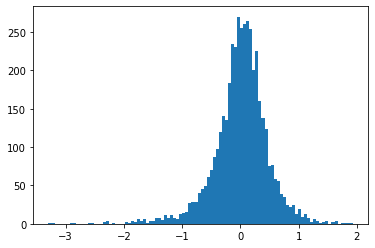

In [64]:
import matplotlib.pyplot as plt
#bins = [-3,-2,-1,0,1,2,3]
#bins = np.linspace(-3,3,100)
plt.hist(values[:,0],bins=100);

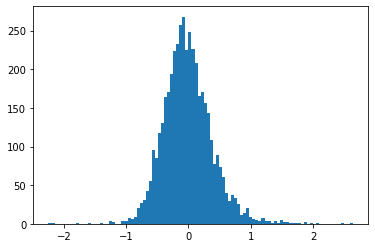

In [65]:
plt.hist(values[:,-1],bins=100);

Text(0, 0.5, 'Number of Instances')

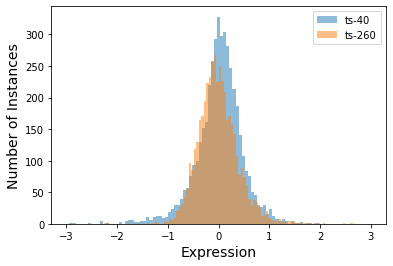

In [66]:
bins = np.linspace(-3,3,100)
plt.hist(values[:,0],bins=bins, alpha=0.5,label="ts-40")
plt.hist(values[:,-1],bins=100,alpha=0.5,label="ts-260")
plt.legend(loc="best");
plt.xlabel("Expression", size=14)
plt.ylabel("Number of Instances", size=14)

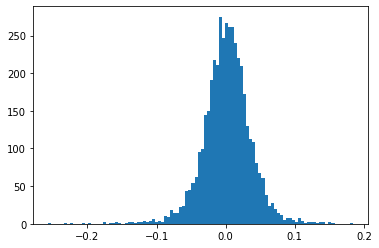

In [67]:
plt.hist(values.mean(axis=1),bins=100);

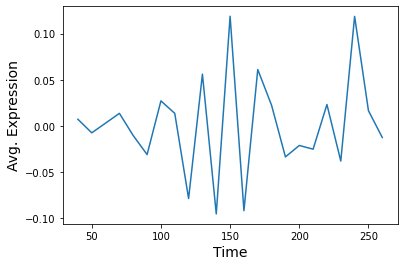

In [68]:
plt.plot(header,values.mean(axis=0))
plt.xlabel("Time",size=14)
plt.ylabel("Avg. Expression",size=14);

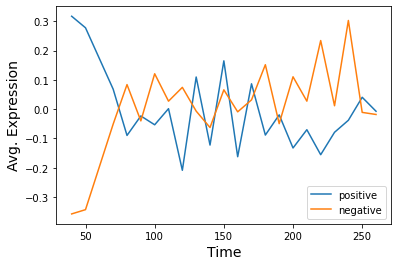

In [69]:
plt.plot(header,(values[values[:,0]>0]).mean(axis=0),label="positive")
plt.plot(header,(values[values[:,0]<0]).mean(axis=0),label="negative");
plt.xlabel("Time",size=14)
plt.ylabel("Avg. Expression",size=14)
plt.legend()